# Support functions


Some support functions are provided in `utils.py`. Read carefully the signatures of the fuctions.

1. `remove_non_letters(word)`
2. `load_stopwords(stopwords_file)`
3. `preprocess(text, stopwords)`
4. `word_count(words)`




In [414]:
# Storing in stopwords the list of the stopwords that is provided






##  Exercise 1


In the data BBC you'll find a collection of a collection of documents from the BBC news website corresponding to stories in five topics. The five topics are:

- business
- entertainment
- politics
- sport
- tech


In the directory, the stories are text files (named: `001.txt`, `002.txt`, ...) organized into five directories, one for topic.

In this exercise, we want to create an **inverted index**. An inverted index is an essential component of a search engine. In fact, given any word, the inverted index allows the search engine to quickly retrieve all documents containing that word.

An inverted index associates each word (you can find in the files) to the list of the names files the word occurs in.

More precisely, for each word, the inverted index will have a list of the names  of the files (make a path relative to the folder _./data_) that contain the word.


(family, \[./data/bbc/tech/006.txt, ./data/bbc/entertainment/003.txt, ./data/bbc/entertainment/005.txt, ...\]



The function $inverted\_index$ has the following input and output:

- **Input.** A RDD $files$, where each element is $(f, content)$, $f$ being the name of a text file in the collection and $content$ being the content of that file;
a Python list $stopwords$, containing the most common English stopwords.
- **Output.** A RDD, where each element is $(w, L)$, $w$ is a word and $L$ is the list of the names of the files containing $w$. The list must not contain duplicate file names.

**Write the code of the function $inverted\_index()$. The function must apply a sequence of RDD transformations to:**

  - split the content of each file into its constituent words.
  - lowercase each word.
  - remove the non-letter characters from each word (you can use the function $remove\_non\_letters$ defined in Exercise 1).
  - remove empty words.
  - remove the stopwords.
  - remove duplicate words.


## Create the data BBC.csv

In [415]:
import pandas as pd
import numpy as np
import glob
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [416]:
data_folder = "./bbc/"
folders = ["business","entertainment","politics","sport","tech"]
os.listdir(data_folder)


['business', 'entertainment', 'politics', 'sport', 'tech']

In [417]:
files = os.listdir('./bbc/business/')

folderslist = [f for f in os.listdir(data_folder) if not f.startswith('.')]


In [418]:
folderslist


['business', 'entertainment', 'politics', 'sport', 'tech']

In [419]:
news = []
newstype = []

In [420]:
for folder in folders:
    folder_path = './bbc/'+folder+'/'
    files = os.listdir(folder_path)
    for text_file in files:
        file_path = folder_path + "/" +text_file
        with open(file_path, errors='replace') as f:
            data = f.readlines()
        data = ' '.join(data)
        news.append(data)
        newstype.append(folder)

In [421]:
len(newstype)


2225

In [422]:
#make a dict of news and its corresponding type
datadict = {'news':news, 'type':newstype}

In [423]:
#convert data to a csv file
df = pd.DataFrame(datadict)
df.to_csv('bbc.csv')

## Classification

In [424]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns

In [425]:
df = pd.read_csv('bbc.csv')

In [426]:
df

,Unnamed: 0,news,type
0,0,Ad sales boost Time Warner profit\n \n Quarter...,business
1,1,Dollar gains on Greenspan speech\n \n The doll...,business
2,2,Yukos unit buyer faces loan claim\n \n The own...,business
3,3,High fuel prices hit BA's profits\n \n British...,business
4,4,Pernod takeover talk lifts Domecq\n \n Shares ...,business
...,...,...,...
2220,2220,BT program to beat dialler scams\n \n BT is in...,tech
2221,2221,Spam e-mails tempt net shoppers\n \n Computer ...,tech
2222,2222,Be careful how you code\n \n A new European di...,tech
2223,2223,US cyber security chief resigns\n \n The man m...,tech


In [427]:
df['category_id'] = df['type'].factorize()[0]

In [428]:
colslist = ['Index', 'news', 'type', 'category_id']
df.columns = colslist

In [429]:
df

,Index,news,type,category_id
0,0,Ad sales boost Time Warner profit\n \n Quarter...,business,0
1,1,Dollar gains on Greenspan speech\n \n The doll...,business,0
2,2,Yukos unit buyer faces loan claim\n \n The own...,business,0
3,3,High fuel prices hit BA's profits\n \n British...,business,0
4,4,Pernod takeover talk lifts Domecq\n \n Shares ...,business,0
...,...,...,...,...
2220,2220,BT program to beat dialler scams\n \n BT is in...,tech,4
2221,2221,Spam e-mails tempt net shoppers\n \n Computer ...,tech,4
2222,2222,Be careful how you code\n \n A new European di...,tech,4
2223,2223,US cyber security chief resigns\n \n The man m...,tech,4


<Axes: xlabel='type'>

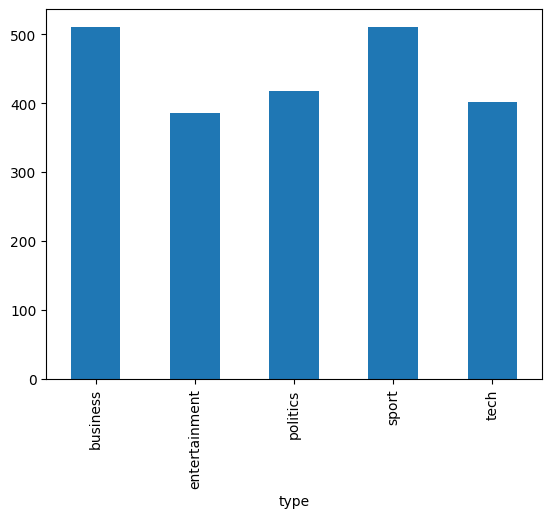

In [430]:
df.groupby('type').Index.count().plot.bar(ylim=0)


In [431]:
df.sample(5, random_state=0)


,Index,news,type,category_id
384,384,Tate & Lyle boss bags top award\n \n Tate & Ly...,business,0
1983,1983,Halo 2 sells five million copies\n \n Microsof...,tech,4
985,985,MSPs hear renewed climate warning\n \n Climate...,politics,2
1386,1386,Pavey focuses on indoor success\n \n Jo Pavey ...,sport,3
1294,1294,Tories reject rethink on axed MP\n \n Sacked M...,politics,2


## Stopwords

In [432]:
text_file = open("stopwords.txt", "r")
stopwords = text_file.read().split('\n')

In [433]:
## REMOVE STOPWORDS
df['news_without_stopwords'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print('THE LENGTH OF COLUMNS "NEWS" WITHOUT STOPWORDS IS:',len(df['news_without_stopwords'][0]))
df['news_without_stopwords']

THE LENGTH OF COLUMNS "NEWS" WITHOUT STOPWORDS IS: 1891


0       Ad sales boost Time Warner profit Quarterly pr...
1       Dollar gains Greenspan speech The dollar hit l...
2       Yukos unit buyer loan claim The owners embattl...
3       High fuel prices hit BA's profits British Airw...
4       Pernod takeover talk lifts Domecq Shares UK dr...
                              ...                        
2220    BT program beat dialler scams BT introducing i...
2221    Spam e-mails tempt net shoppers Computer users...
2222    Be careful code A European directive software ...
2223    US cyber security chief resigns The US compute...
2224    Losing yourself online gaming Online role play...
Name: news_without_stopwords, Length: 2225, dtype: object

In [434]:
## REMOVE THE SUFFICES 
ps = PorterStemmer()
df['news_porter_stemmed'] = df['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
df['news_without_stopwords']

0       Ad sales boost Time Warner profit Quarterly pr...
1       Dollar gains Greenspan speech The dollar hit l...
2       Yukos unit buyer loan claim The owners embattl...
3       High fuel prices hit BA's profits British Airw...
4       Pernod takeover talk lifts Domecq Shares UK dr...
                              ...                        
2220    BT program beat dialler scams BT introducing i...
2221    Spam e-mails tempt net shoppers Computer users...
2222    Be careful code A European directive software ...
2223    US cyber security chief resigns The US compute...
2224    Losing yourself online gaming Online role play...
Name: news_without_stopwords, Length: 2225, dtype: object

In [435]:
## LOWER CASE 
df['news_porter_stemmed'] = df['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df['news_porter_stemmed']

0       ad sale boost time warner profit quarterli pro...
1       dollar gain greenspan speech the dollar hit le...
2       yuko unit buyer loan claim the owner embattl r...
3       high fuel price hit ba' profit british airway ...
4       pernod takeov talk lift domecq share uk drink ...
                              ...                        
2220    bt program beat dialler scam bt introduc initi...
2221    spam e-mail tempt net shopper comput user worl...
2222    be care code a european direct softwar writer ...
2223    us cyber secur chief resign the us comput netw...
2224    lose yourself onlin game onlin role play game ...
Name: news_porter_stemmed, Length: 2225, dtype: object

In [436]:
## REMOVE THE NON-LETTER CHARACTERS FROM EACH WORD
df['news_porter_stemmed'] = df['news_porter_stemmed'].str.replace('[^\w\s]','')
df['news_porter_stemmed']

0       ad sale boost time warner profit quarterli pro...
1       dollar gain greenspan speech the dollar hit le...
2       yuko unit buyer loan claim the owner embattl r...
3       high fuel price hit ba' profit british airway ...
4       pernod takeov talk lift domecq share uk drink ...
                              ...                        
2220    bt program beat dialler scam bt introduc initi...
2221    spam e-mail tempt net shopper comput user worl...
2222    be care code a european direct softwar writer ...
2223    us cyber secur chief resign the us comput netw...
2224    lose yourself onlin game onlin role play game ...
Name: news_porter_stemmed, Length: 2225, dtype: object

In [437]:
## REMOVE EMPTY WORDS
df['news_porter_stemmed'] = df['news_porter_stemmed'].apply(lambda x: ' '.join(filter(None, x.split())))
df['news_porter_stemmed']

0       ad sale boost time warner profit quarterli pro...
1       dollar gain greenspan speech the dollar hit le...
2       yuko unit buyer loan claim the owner embattl r...
3       high fuel price hit ba' profit british airway ...
4       pernod takeov talk lift domecq share uk drink ...
                              ...                        
2220    bt program beat dialler scam bt introduc initi...
2221    spam e-mail tempt net shopper comput user worl...
2222    be care code a european direct softwar writer ...
2223    us cyber secur chief resign the us comput netw...
2224    lose yourself onlin game onlin role play game ...
Name: news_porter_stemmed, Length: 2225, dtype: object

In [438]:
df = df[['Index', 'type', 'category_id', 'news_porter_stemmed']]
df

,Index,type,category_id,news_porter_stemmed
0,0,business,0,ad sale boost time warner profit quarterli pro...
1,1,business,0,dollar gain greenspan speech the dollar hit le...
2,2,business,0,yuko unit buyer loan claim the owner embattl r...
3,3,business,0,high fuel price hit ba' profit british airway ...
4,4,business,0,pernod takeov talk lift domecq share uk drink ...
...,...,...,...,...
2220,2220,tech,4,bt program beat dialler scam bt introduc initi...
2221,2221,tech,4,spam e-mail tempt net shopper comput user worl...
2222,2222,tech,4,be care code a european direct softwar writer ...
2223,2223,tech,4,us cyber secur chief resign the us comput netw...




##  Exercise 2


Given the BBC collection, we want to calculate the **co-occurrence matrix** $M$, such that $M[w_1][w_2]$ is the number of documents in which two words $w_1$ and $w_2$ appear in the same document (it does not matter if they are consecutive or not).



The function $co\_occurrence\_matrix()$ has the following input and output:
- **Input.** A RDD $files$ and a Python list $stopwords$, as in the previous exercise.
- **Output.** A RDD, where each element is $((w_1, w_2), occ)$, where $w_1$ and $w_2$ are words and $occ$ is the number of files in which the two words appear together.
As in the case of the function $inverted\_index()$, words must be lowercases, non-letter characters, empty words and stopwords should be removed.


**Write the code of the function $co\_occurrence\_matrix()$. You can draw inspiration from the MapReduce algorithms that we discussed in class. Also, you can use the already implemented function $create\_pairs()$ to generate all the possible pairs from a list of words. The function assumes that the words in the input list are sorted lexicographically.**
<br>
</font>
</p>

<hr style="border:solid 2px;">

In [439]:
def distinct_words(corpus):

    corpus_words = []
    num_corpus_words = -1
    
     
    corpus_words_set = set()
    for paragraph in corpus:
        corpus_words_set.update(paragraph)
    corpus_words = sorted(list(corpus_words_set))
    num_corpus_words = len(corpus_words_set)

    return corpus_words, num_corpus_words

In [440]:
def co_occurrence_matrix(corpus, window_size=4):

    words, num_words = distinct_words(corpus)
    M = None
    word2Ind = {}
    
    M = np.zeros(shape=(num_words, num_words), dtype=np.int32)
    word2Ind = {word:idx for idx, word in enumerate(words)}
    for paragraph in corpus:
        for i, center_word in enumerate(paragraph):
            contex_words = paragraph[i-window_size:i] + paragraph[i+1:i+window_size+1]
            center_word_idx = word2Ind[center_word]
            for contex_word in contex_words:
                contex_word_idx = word2Ind[contex_word]
                M[center_word_idx][contex_word_idx] += 1

    return M, word2Ind

In [445]:
def read_stopwords(stopwords_path):
    with open(stopwords_path, 'r') as stopwords_file:
        stopwords = set(stopwords_file.read().splitlines())
    return stopwords

corpus = [text.split() for text in df['news_porter_stemmed']]

## load stopwords
stopwords = read_stopwords('stopwords.txt')

## test distinct_words function
corpus_words, num_corpus_words = distinct_words(corpus)
print('Distinct Words:' ,corpus_words)
print('Number of Distinct Words: ',num_corpus_words)

## test
window_size = 4
M, word2Ind = co_occurrence_matrix(corpus, window_size)
print("Co-occurrence Matrix:", M)
print("Word to Index Mapping:", word2Ind)



Distinct Words: ['!', '"', '""unconscionable,', '"\'i', '"\'oh', '"\'we', '"\'you', '"(when', '"...it', '"100%', '"1983', '"2+2=5".', '"2004', '"2004\'', '"2005', '"2006', '"21st', '"27%', '"3g', '"4th', '"50\'', '"50-50"', '"50/50".', '"[alastair]', '"[but]', '"[godzilla\'s]', '"[i\'m]', '"[it]', '"[oil', '"[phone-tap', '"[the', '"a', '"a"', '"abandon', '"abhorr', '"abhorrent"', '"abil', '"abnorm', '"about', '"abov', '"absolut', '"absolutely"', '"abstent', '"absurd', '"absurd"', '"abus', '"accept', '"access', '"accident', '"accordingly,', '"achiev', '"acknowledg', '"acquiescent"', '"act', '"action', '"ad', '"adam', '"add', '"add-ons"', '"addict', '"adher', '"adjusted"', '"adult', '"adults"', '"advertis', '"affect', '"affect"', '"affordable"', '"affordable".', '"afraid', '"africa', '"after', '"against', '"agendas".', '"agent', '"aggregator".', '"aggress', '"aggressive"', '"agnostic"', '"agre', '"agricultur', '"agroflora', '"ah', '"aim', '"airbu', '"airi', '"alarm', '"alex', '"all', '"a



##  Exercise 3 - OPTIONAL - enjoy with what you just wrote


We want to code a function $term\_freq$ that computes the frequency of each word in a
text document.
More precisely, given a document $d$ and a word $w$ in that document, we want to
compute its frequency $tf(w, d)$, as follows:
    

$$ tf(w, d) = \frac{f_{w, d}}{\sum\limits_{w^\prime \in d} f_{w^\prime, d}}$$

where $f_{w, d}$ is the number of occurrences of word $w$ in $d$.


The function $term\_freq$ has the following input and output:

- **Input.** A RDD $words$, where each element is a word in a text document $d$ (pre-processing already done).
- **Output.** A RDD, where each element is a key-value pair $(w, tf(w, d))$.

**Write the code of the function $term\_freq$. You can take advantage of the function $word_count$.**
